In [96]:
import pickle
import seaborn
import numpy as np
import httplib
import json
from skimage import io
from imdb import IMDb
import pandas as pd

# Fantastic World!

- Search by name

In [123]:
ia = IMDb(accessSystem= 'http' )
search_movie = ia.search_movie('Fantastic Beasts and Where to Find Them')

In [124]:
search_movie

[<Movie id:3183660[http] title:_Fantastic Beasts and Where to Find Them (2016)_>,
 <Movie id:6677432[http] title:_"Fantastic Beasts and Where to Find Them (2016) (TV Episode)  - Season 1 | Episode 12  - The Dom Reviews" (2014)_>,
 <Movie id:4123430[http] title:_Fantastic Beasts and Where to Find Them 2 (2018)_>,
 <Movie id:4123432[http] title:_Fantastic Beasts and Where to Find Them 3 (2020)_>,
 <Movie id:6149054[http] title:_Fantastic Beasts and Where to Find Them 5 (2024)_>,
 <Movie id:6149052[http] title:_Fantastic Beasts and Where to Find Them 4 (2022)_>,
 <Movie id:4940424[http] title:_"Fantastic Beasts and Where to Find Them/Bleed for This/The Edge of Seventeen/Manchester by the Sea (2016) (TV Episode)  - Season 12 | Episode 10  - Made in Hollywood" (2005)_>,
 <Movie id:6709962[http] title:_"Fantastic Beasts & Where to Find Them (2017) (TV Episode)  - Season 6 | Episode 13  - Honest Trailers" (2012)_>,
 <Movie id:6241668[http] title:_"Cast of "Fantastic Beasts and Where to Find T

- Get ID and Extract information by ID

In [22]:
#IMDb
favorite_movie_imdb = ia.get_movie(3183660) 
print favorite_movie_imdb
print "Genres from IMDb: ", favorite_movie_imdb['genres']

Fantastic Beasts and Where to Find Them
Genres from IMDb:  [u'Adventure', u'Family', u'Fantasy']


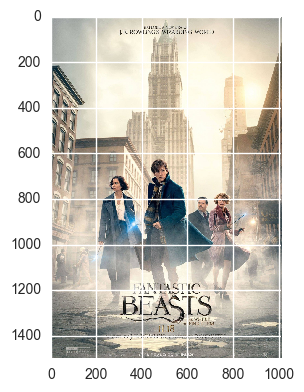

In [25]:
io.imshow(io.imread(favorite_movie_imdb['full-size cover url']))
io.show()

In [82]:
#TMDb
def tmdb_request(url):
    api_key = "&api_key=7fbe755e9e83c66a573c6482cefd23ed"
    conn = httplib.HTTPSConnection("api.themoviedb.org")
    conn.request("GET", url + api_key)
    res = conn.getresponse()
    data = res.read()
    j = json.loads(data)
    return j

def tmdb_get_movie_by_imdb_id(imdb_id):
    api_key = "7fbe755e9e83c66a573c6482cefd23ed"
    conn = httplib.HTTPSConnection("api.themoviedb.org")
    conn.request("GET", 
                 "/3/find/tt"+str(imdb_id)+"?api_key="+api_key+"&external_source=imdb_id", 
                 "{}")
    data = json.loads(conn.getresponse().read().decode("utf-8"))
    tmdb_id = data['movie_results'][0]['id']
    return tmdb_get_movie_by_tmdb_id(tmdb_id)
    
def tmdb_get_movie_by_tmdb_id(tmdb_id):
    api_key = "7fbe755e9e83c66a573c6482cefd23ed"
    conn = httplib.HTTPSConnection("api.themoviedb.org")
    conn.request("GET", 
                 "/3/movie/"+str(tmdb_id)+"?api_key="+api_key, 
                 "{}")
    return conn.getresponse().read().decode("utf-8")
def tmdb_get_poster_url(path):
    return "https://image.tmdb.org/t/p/w500" + path

In [97]:
favorite_movie_tmdb = json.loads(tmdb_get_movie_by_imdb_id(3183660))

In [87]:
favorite_movie_tmdb['genres']

[{u'id': 12, u'name': u'Adventure'},
 {u'id': 28, u'name': u'Action'},
 {u'id': 14, u'name': u'Fantasy'}]

In [89]:
url = tmdb_get_poster_url(favorite_movie_tmdb['poster_path'])

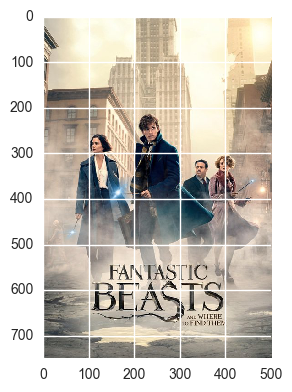

In [90]:
io.imshow(io.imread(url))
io.show()

# Top 10 popular movies of 2016

In [91]:
#get top 10 popular movies of 2016 using discover
popular_2016 = tmdb_request("/3/discover/movie?primary_release_year=2016&sort_by=popularity.desc")
print popular_2016.keys()
popular_2016_top_10 = popular_2016['results'][:10]

[u'total_results', u'total_pages', u'page', u'results']


In [92]:
for m in popular_2016_top_10:
    title = m['title']
    ID = m['id']
    genre_dict = json.loads(tmdb_get_movie_by_tmdb_id(ID))['genres'] #get details by ID and retrieve genres
    genre_list =  [str(ele['name']) for ele in genre_dict] #transrform into a nicer form
    print title, genre_list #print result

Sing ['Animation', 'Comedy', 'Drama', 'Family', 'Music']
Fantastic Beasts and Where to Find Them ['Adventure', 'Action', 'Fantasy']
Finding Dory ['Adventure', 'Animation', 'Comedy', 'Family']
Arrival ['Drama', 'Science Fiction']
Deadpool ['Action', 'Adventure', 'Comedy', 'Romance']
Captain America: Civil War ['Action', 'Science Fiction']
Rogue One: A Star Wars Story ['Action', 'Drama', 'Science Fiction', 'War']
Underworld: Blood Wars ['Action', 'Horror']
Doctor Strange ['Action', 'Adventure', 'Fantasy', 'Science Fiction']
X-Men: Apocalypse ['Action', 'Adventure', 'Fantasy', 'Science Fiction']


# Compare Info from IMDb and TMDb

In [160]:
{ele: favorite_movie_imdb[ele] for ele in favorite_movie_imdb.keys()}

{'akas': [u'Animales fant\xe1sticos y d\xf3nde encontrarlos::Chile (imdb display title), Mexico (imdb display title), Spain (imdb display title), Uruguay (3-D version)',
  u'\u03a6\u03b1\u03bd\u03c4\u03b1\u03c3\u03c4\u03b9\u03ba\u03ac \u03b6\u03ce\u03b1 \u03ba\u03b1\u03b9 \u03c0\u03bf\u03cd \u03b2\u03c1\u03af\u03c3\u03ba\u03bf\u03bd\u03c4\u03b1\u03b9::Greece',
  u'\u0424\u0430\u043d\u0442\u0430\u0441\u0442\u0438\u0447\u0435\u0441\u043a\u0438\u0435 \u0442\u0432\u0430\u0440\u0438 \u0438 \u0433\u0434\u0435 \u043e\u043d\u0438 \u043e\u0431\u0438\u0442\u0430\u044e\u0442::Russia',
  u'\u0424\u0430\u043d\u0442\u0430\u0441\u0442\u0438\u0447\u043d\u0438 \u0436\u0438\u0432\u043e\u0442\u043d\u0438 \u0438 \u043a\u044a\u0434\u0435 \u0434\u0430 \u0433\u0438 \u043d\u0430\u043c\u0435\u0440\u0438\u043c::Bulgaria (Bulgarian title)',
  u'\u0424\u0430\u043d\u0442\u0430\u0441\u0442\u0438\u0447\u043di \u0437\u0432i\u0440i i \u0434\u0435 i\u0445 \u0448\u0443\u043a\u0430\u0442\u0438::Ukraine',
  u'Animais Fant

as for the titles, we considered two ways:
1. Use english titles
2. Use titles where it is produced/in what language (but not comparable among, countries have different grammar systems.)

**IMDb select attributes**

In [216]:
favorite_movie_imdb.keys()

[u'music department',
 'sound crew',
 'camera and electrical department',
 u'distributors',
 'rating',
 'runtimes',
 'costume designer',
 'make up',
 'year',
 'production design',
 'miscellaneous crew',
 'color info',
 u'casting department',
 'languages',
 'votes',
 'producer',
 'title',
 'mpaa',
 'assistant director',
 'writer',
 'casting director',
 'visual effects',
 'production manager',
 'set decoration',
 'editor',
 'certificates',
 u'costume department',
 'country codes',
 'language codes',
 'cover url',
 u'special effects department',
 'special effects companies',
 'sound mix',
 u'location management',
 'genres',
 'director',
 'stunt performer',
 'miscellaneous companies',
 'cinematographer',
 'art direction',
 'akas',
 'aspect ratio',
 u'production companies',
 'kind',
 u'art department',
 'countries',
 u'transportation department',
 'plot outline',
 'plot',
 'cast',
 u'animation department',
 'original music',
 u'editorial department',
 'canonical title',
 'long imdb title',


In [187]:
#a list to helpful attributes from imdb
attr_imdb =  favorite_movie_imdb.keys()
attr_keep_imdb = ['rating','runtimes','year','color info','languages','votes','title','mpaa','certificates','country codes',
                 'language codes','cover url','sound mix','genres','director','aspect ratio','production companies'
                 ,'kind','countries','plot outline','plot','original music','canonical title','long imdb title','long imdb canonical title',
                 'smart canonical title','smart long imdb canonical title','full-size cover url']

**Transform into dataframe**

In [272]:
#tmdb
df1 = pd.DataFrame([favorite_movie_tmdb])
df1['imdb_id'] = df1['imdb_id'].apply(lambda x: x[2:])
df1

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/kMzU4PkXcKcDMngCxXji0BbVXsu.jpg,{u'backdrop_path': u'/jc1Sh8U6dvWv9rHaRl8aosTA...,180000000,"[{u'id': 12, u'name': u'Adventure'}, {u'id': 2...",http://www.fantasticbeasts.com/,259316,3183660,en,Fantastic Beasts and Where to Find Them,...,2016-11-16,809342332,133,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,From J.K. Rowling's wizarding world.,Fantastic Beasts and Where to Find Them,False,7.0,3122


In [268]:
#convert imdb movie object to dictionary
def imdb_to_dict(movie):
    
    new_dict = {}
    new_dict['imdb_id'] = movie.getID()
    
    for ele in attr_keep_imdb:
        
        #check type list and convert every element to str
        if type(movie[ele]) == list:
            value = [str(i) for i in movie[ele]]
            new_dict[ele] = value
            
        new_dict[ele] = movie[ele]
    
    df = pd.DataFrame([new_dict])
    return df

In [269]:
df2 = imdb_to_dict(favorite_movie_imdb)
df2

,aspect ratio,canonical title,certificates,color info,countries,country codes,cover url,director,full-size cover url,genres,...,plot outline,production companies,rating,runtimes,smart canonical title,smart long imdb canonical title,sound mix,title,votes,year
0,1.85 : 1,Fantastic Beasts and Where to Find Them,"[Argentina:13, Australia:M, Austria:10, Belgiu...",[Color],"[UK, USA]","[gb, us]",https://images-na.ssl-images-amazon.com/images...,[David Yates],https://images-na.ssl-images-amazon.com/images...,"[Adventure, Family, Fantasy]",...,The adventures of writer Newt Scamander in New...,"[Heyday Films, Warner Bros.]",7.5,[133],Fantastic Beasts and Where to Find Them,Fantastic Beasts and Where to Find Them (2016),"[Datasat, Dolby Digital, Dolby Atmos]",Fantastic Beasts and Where to Find Them,205785,2016


In [273]:
pd.merge(df1,df2,on = 'imdb_id')

,adult,backdrop_path,belongs_to_collection,budget,genres_x,homepage,id,imdb_id,original_language,original_title,...,plot outline,production companies,rating,runtimes,smart canonical title,smart long imdb canonical title,sound mix,title_y,votes,year
0,False,/kMzU4PkXcKcDMngCxXji0BbVXsu.jpg,{u'backdrop_path': u'/jc1Sh8U6dvWv9rHaRl8aosTA...,180000000,"[{u'id': 12, u'name': u'Adventure'}, {u'id': 2...",http://www.fantasticbeasts.com/,259316,3183660,en,Fantastic Beasts and Where to Find Them,...,The adventures of writer Newt Scamander in New...,"[Heyday Films, Warner Bros.]",7.5,[133],Fantastic Beasts and Where to Find Them,Fantastic Beasts and Where to Find Them (2016),"[Datasat, Dolby Digital, Dolby Atmos]",Fantastic Beasts and Where to Find Them,205785,2016


# Load files from TMDb and IMDb and merge them

In [ ]:
def 

# Get person Info

In [235]:
str(favorite_movie_imdb['director'])

'[<Person id:0946734[http] name:_Yates, David_>]'

In [231]:
person = ia.get_person('0946734')

In [234]:
for k in person.keys():
    print k,'\t\t',person[k] ,'\n'

name 		David Yates 

producer 		[<Movie id:0918940[http] title:_The Legend of Tarzan (2016)_>, <Movie id:2568204[http] title:_"Tyrant" (2014)_>, <Movie id:1029224[http] title:_Tale of Three Seaside Towns (1995)_>, <Movie id:0466194[http] title:_When I Was a Girl (1988)_>] 

in development 		[<Movie id:3234608[http] title:_Who Is Jake Ellis? (????)_>] 

self 		[<Movie id:0192897[http] title:_"Film 2017" (2016)_>, <Movie id:6267730[http] title:_The Legend of Tarzan: Creating the Virtual Jungle (2016)_>, <Movie id:6267696[http] title:_The Legend of Tarzan: Tarzan Reborn (2016)_>, <Movie id:0911896[http] title:_"Made in Hollywood" (2010)_>, <Movie id:1245693[http] title:_"Made in Hollywood: Teen Edition" (2011)_>, <Movie id:1415098[http] title:_"Piers Morgan's Life Stories" (2015)_>, <Movie id:2339417[http] title:_Creating the World of Harry Potter, Part 8: Growing Up (2012)_>, <Movie id:2917244[http] title:_Warner Bros. Studio Tour London: The Making of Harry Potter (2012)_>, <Movie id:20